Ive created two versions.  
* One that uses numpy
* One that is done via list comprehensions

# Numpy

In [1]:
from ddc_machine_learning.ml.gradient_descent.polynomial_gradient_descent import Polynomial_GD as P_GD
import numpy as np

#### Simulate a random polynomial shape

In [2]:
coefficients = np.array([1,2,-5, -6])

#### Initialise Polynomial Gradient Descent

In [3]:
# Initialise function
pgd = P_GD(
    n = 4, learning_rate = 0.00001, early_stop = 1e-2, steps = 1000)

#### Create random data

In [4]:
# Get x_values
x_values = pgd.simulate_x_values(-5, 5, 100)

# Get y_values with some noise
y_values = np.array([pgd.f(x, coefficients, 10) for x in x_values])

In [5]:
# Random coefficients
pgd.coefficients

array([-9.33530972,  9.59396373,  7.03057607, -9.73561399])

#### Fit the data

In [ ]:
%%time
# Fit the data
pgd.fit(x_values, y_values)

#### Plot data

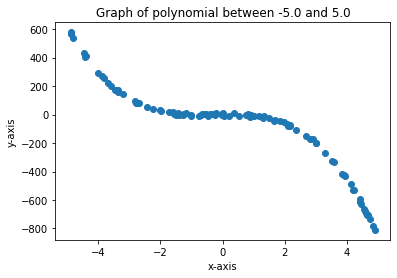

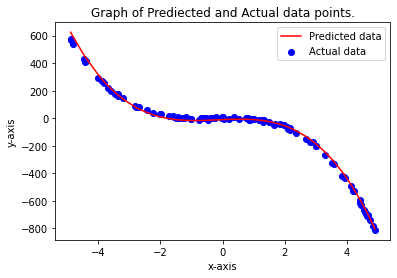

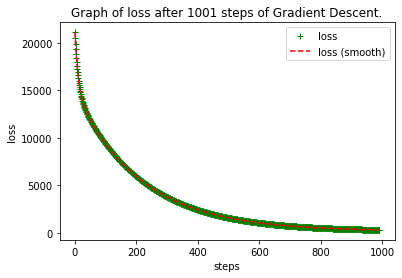

In [7]:
pgd.plot_polynomial()
pgd.plot_actual_predicted()
pgd.plot_loss()

#### Predict

In [8]:
# Get x_values
x_values = pgd.simulate_x_values(-5, 5, 100)

# Get y_values with some noise
y_values = pgd.predict(x_values)

# No Packages

In [9]:
from ddc_machine_learning.ml.gradient_descent.polynomial_gradient_descent_independant import Polynomial_GD as P_GD_ind

#### Simulate a random polynomial shape

In [10]:
coefficients = [1,2,-5, -6]

#### Initialise Polynomial Gradient Descent

In [17]:
pgd_ind = P_GD_ind(n=4, initial_coefficients = [1,1,1,1])

#### Create random data

In [18]:
# Get x_values
x_values = pgd_ind.simulate_x_values(-5, 5, 100)

# Get y_values with some noise
y_values = [pgd_ind.f(x, coefficients, 10) for x in x_values]

#### Fit the data

In [19]:
%%time
# Fit the data
pgd_ind.fit(x_values, y_values)

Early cut off, difference of losses between steps is less that 0.0001.
Wall time: 16.2 s


In [14]:
data = pgd_ind.predict(x_values)

#### Plot data

In [15]:
import matplotlib.pyplot as plt

def plot_polynomial():
    """
    Function to plot the variables of 2 lists.
    """
    plt.scatter(pgd_ind.x_values, pgd_ind.y_values)
    plt.title(f"Graph of polynomial between {min(pgd_ind.x_values)} and {max(pgd_ind.x_values)}")
    plt.xlabel('x-axis')
    plt.ylabel('y-axis')
    plt.show()


def plot_actual_predicted():
    """
    Function to plot actual values and predicted values.

    ::param coeffients: (list[floats])
    ::param x_values: (list[floats])
    ::param y_values: (list[floats])    
    """
    predicted = [pgd_ind.f(x, pgd_ind.coefficients) for x in pgd_ind.x_values]

    plt.scatter(pgd_ind.x_values, pgd_ind.y_values, label = "Actual data", c = 'b')
    plt.plot(pgd_ind.x_values, predicted, label = "Predicted data", c =  'r')
    plt.title(f"Graph of Prediected and Actual data points.")
    plt.xlabel('x-axis')
    plt.ylabel('y-axis')
    plt.legend()
    plt.show()


def plot_loss():
    """
    Function to plot the loss of a gradient descent process.
    """
    plt.plot(pgd_ind.loss[10:], 'g+', label = "loss")
    plt.plot(pgd_ind.loss[10:], 'r--', label = "loss (smooth)")
    plt.title(f"Graph of loss after {len(pgd_ind.loss)} steps of Gradient Descent.")
    plt.xlabel('steps')
    plt.ylabel('loss')
    plt.legend()
    plt.show()


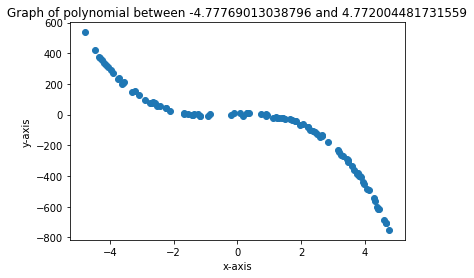

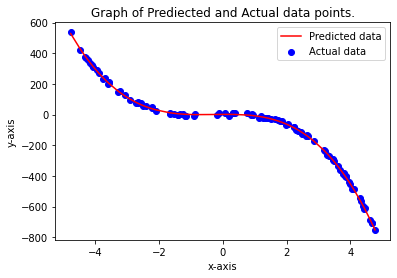

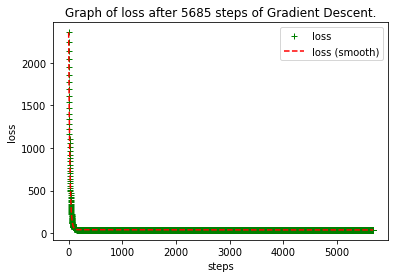

In [16]:
plot_polynomial()
plot_actual_predicted()
plot_loss()